In [260]:
from matplotlib import pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd

print(plt.style.available)

df = pd.read_csv('toyota.csv')
print(df)
df.dtypes

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
               model  year  price transmission  ...  fuelType  tax   mpg  engineSize
0               GT86  2016  16000       Manual  ...    Petrol  265  36.2         2.0
1               GT86  2017  15995       Manual  ...    Petrol  145  36.2         2.0
2               GT86  2015  13998       Manual  ...    Petrol  265  36.2         2.0
3               GT86  2017  18998       Manual  ...    Petrol  150  36.2         2.0
4               GT86  2017  17498       Manual  ...    Petrol  145  36.2         2.0
...      

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [261]:
df.describe(include='all')

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
count,6738,6738.000000,6738.000000,6738,6738.000000,6738,6738.000000,6738.000000,6738.000000
unique,18,NaN,NaN,4,NaN,4,NaN,NaN,NaN
top,Yaris,NaN,NaN,Manual,NaN,Petrol,NaN,NaN,NaN
freq,2122,NaN,NaN,3826,NaN,4087,NaN,NaN,NaN
mean,NaN,2016.748145,12522.391066,NaN,22857.413921,NaN,94.697240,63.042223,1.471297
std,NaN,2.204062,6345.017587,NaN,19125.464147,NaN,73.880776,15.836710,0.436159
min,NaN,1998.000000,850.000000,NaN,2.000000,NaN,0.000000,2.800000,0.000000
25%,NaN,2016.000000,8290.000000,NaN,9446.000000,NaN,0.000000,55.400000,1.000000
50%,NaN,2017.000000,10795.000000,NaN,18513.000000,NaN,135.000000,62.800000,1.500000
75%,NaN,2018.000000,14995.000000,NaN,31063.750000,NaN,145.000000,69.000000,1.800000


In [262]:
df.isna().sum()

print(df['engineSize'].unique())

[2.  1.8 1.2 1.6 1.4 2.5 2.2 1.5 1.  1.3 0.  2.4 3.  2.8 4.2 4.5]


## Data Validation

There are no missing values on the dataset.<br>
All data type columns are consistent with the information provided about the dataset.<br>
I don't see misstyped data on any column.<br>
<br>
### No cleaning is needed.

What are the characteristics that would influentiate the most in buyers to chose a car?
- Model
- Price
- fuelType
- Tax

We'll evaluate how many cars we sold for each fuel type

In [263]:
df2= df['fuelType'].value_counts()
print(df2)

Petrol    4087
Hybrid    2043
Diesel     503
Other      105
Name: fuelType, dtype: int64


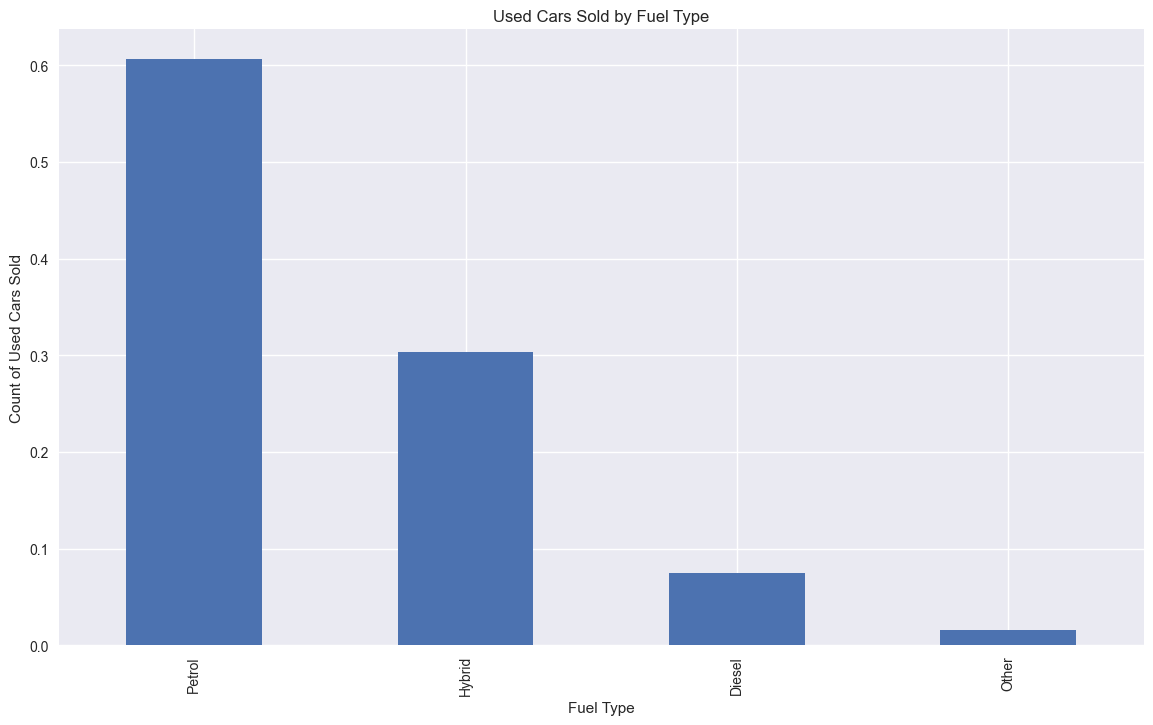

In [289]:
plt.style.use('seaborn')

df['fuelType'].value_counts(normalize = True).plot(kind='bar',
                                    figsize=(14,8),
                                    xlabel = "Fuel Type",
                                    ylabel = "Count of Used Cars Sold",
                                    title="Used Cars Sold by Fuel Type")
plt.show()

Comparing Petrol cars vs Hybrid cars, the first one doubles the last. There is a big opportunity to develop

What models are the most sold in the hybrid group?

In [265]:
df2 = df[df['fuelType']== 'Hybrid']
df2[['fuelType','model']].groupby('fuelType').value_counts()

fuelType  model   
Hybrid     Yaris      557
           Auris      498
           C-HR       352
           RAV4       230
           Prius      214
           Corolla    181
           Camry       11
dtype: int64

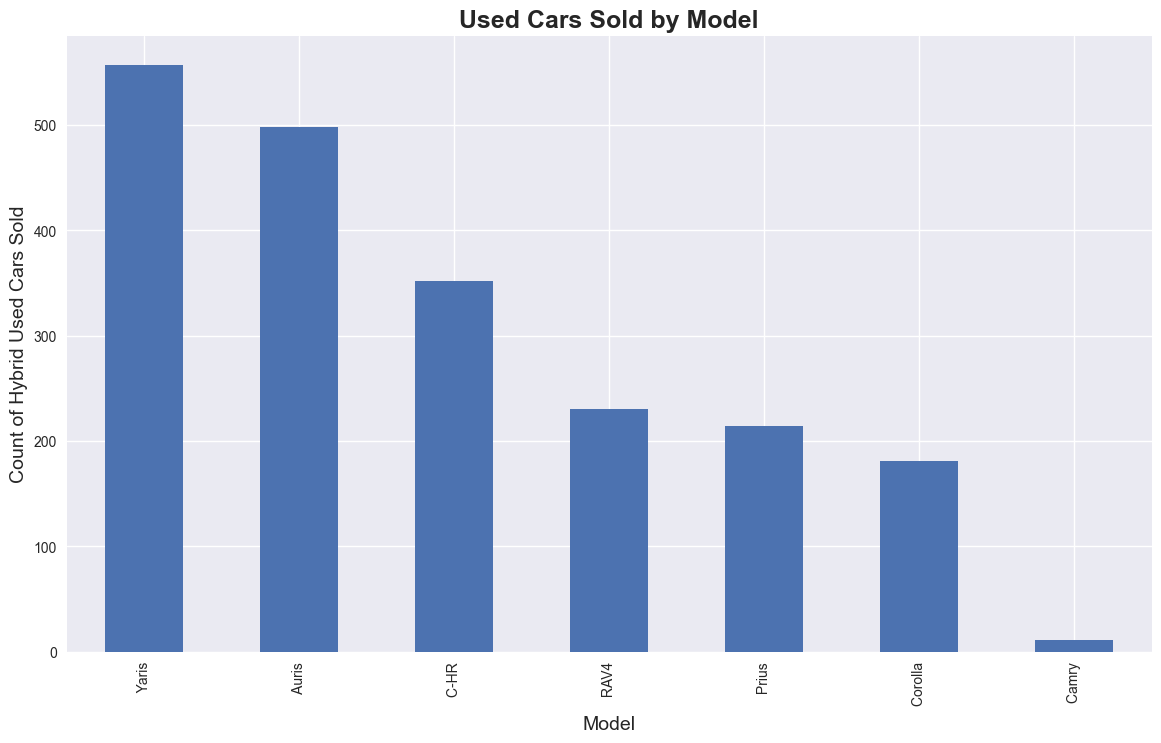

In [266]:
df2['model'].value_counts().plot(kind='bar',
                                    figsize=(14,8))
plt.xlabel('Model', size = 14)
plt.ylabel('Count of Hybrid Used Cars Sold', size = 14)            
plt.title('Used Cars Sold by Model', size = 18, weight = 'semibold', fontfamily = 'Arial')
plt.show()

The most hybrid car sold is Yaris, closely followed by Auris, and then by CH-R

How does the prices vary on each fuel type? I want to know the distribution of prices of each them

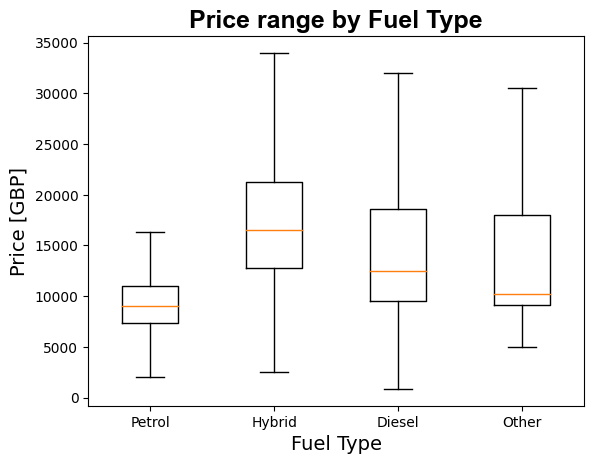

In [327]:
df_PetrolPrice = df['price'][df['fuelType']=='Petrol']
df_HybridPrice = df['price'][df['fuelType']=='Hybrid']
df_DieselPrice = df['price'][df['fuelType']=='Diesel']
df_OtherPrice = df['price'][df['fuelType']=='Other']
data=[df_PetrolPrice,df_HybridPrice,df_DieselPrice,df_OtherPrice]

#Chequearé que el filtro haya estado bien
df4 = pd.unique(df['fuelType'])
#print(df4)

plt.style.use('default')

plt.boxplot(data,
           labels = ['Petrol','Hybrid','Diesel','Other'],
           showfliers = False)
plt.xlabel('Fuel Type', size = 14)
plt.ylabel('Price [GBP]', size = 14)            
plt.title('Price range by Fuel Type', size = 18, weight = 'semibold', fontfamily = 'Arial')
plt.show()

As suspected by the business, Hybrid cars are significantly more expensive that Petrol cars. But we have some Hybrid cars in the range from 2000 GBP to 13000 GBP at sales, so we have some models that are competitive with Petrol cars. Let's see which Hybrid models can be competitive against the Petrol cars:

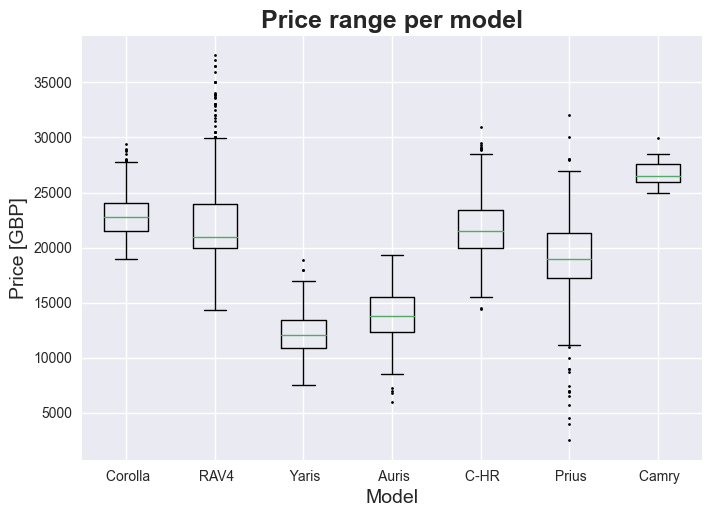

In [290]:

#First I want to see which Hybrid models are available
dfh = df[df['fuelType']=='Hybrid']
models = dfh['model'].unique()
#print(models)

PrCorolla = dfh['price'][dfh['model']==' Corolla']
PrRAV4 = dfh['price'][dfh['model']==' RAV4']
PrYaris = dfh['price'][dfh['model']==' Yaris']
PrAuris = dfh['price'][dfh['model']==' Auris']
PrCHR = dfh['price'][dfh['model']==' C-HR']
PrPrius = dfh['price'][dfh['model']==' Prius']
PrCamry = dfh['price'][dfh['model']==' Camry']

data2 = [PrCorolla,PrRAV4,PrYaris,PrAuris,PrCHR,PrPrius,PrCamry]

flierprops = dict(marker='.', markersize=2)

plt.boxplot(data2,
           labels = [' Corolla',' RAV4',' Yaris',' Auris',' C-HR' ,' Prius',' Camry'],
            flierprops= flierprops,
           )
plt.xlabel('Model', size = 14)
plt.ylabel('Price [GBP]', size = 14)
plt.title('Price range per model', size = 18, weight = 'semibold', fontfamily = 'Arial')
plt.show()


The only models that can compete in price comparison are Yaris, Auris and Prius. The last one are normally more expensive.
As we saw before, Yaris and Auris are the hybrid cars with the most sales.

How does the Petrol and Hybrid cars compare in tax matters?

Text(0.5, 1.0, 'Average Tax by Fuel Type')

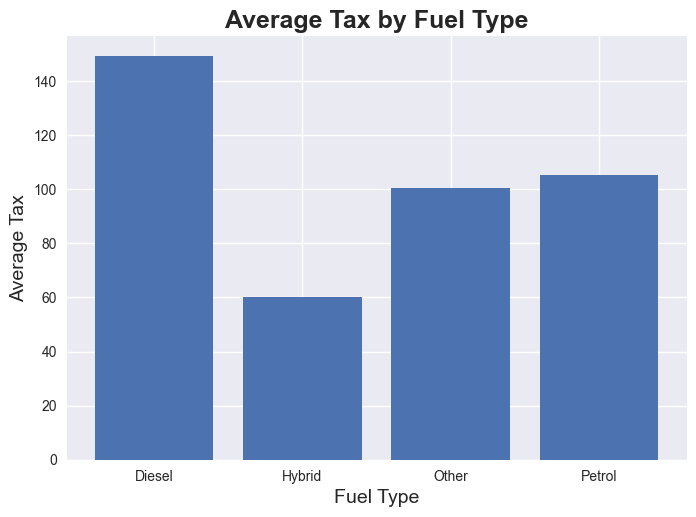

In [291]:
df2 = df.groupby('fuelType')['tax'].mean().reset_index()

#print(df2)

plt.bar(df2['fuelType'],df2['tax'])
plt.ylabel('Average Tax', size = 14)
plt.xlabel('Fuel Type', size = 14)
plt.title('Average Tax by Fuel Type', size = 18, weight = 'semibold', fontfamily = 'Arial')

In a quick view, we see Hybrid are significantly lower in average tax. But let's check a count for each tax category sold for further information

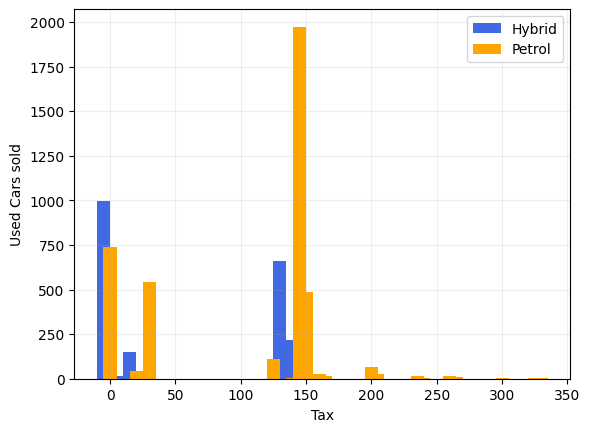

In [288]:
#We filter all Hybrid and Petrol car, and select columns: fuelType, tax, and count of each one
dftax = df[df['fuelType'].isin(['Hybrid','Petrol'])]
dftax = dftax.groupby(['fuelType','tax'])['fuelType','tax'].value_counts()

dftax2 = pd.DataFrame(dftax).rename(columns= {0:'count'}).reset_index()
#print(dftax2,type(dftax2))

xh = dftax2[dftax2['fuelType'] == 'Hybrid']['tax']
yh = dftax2[dftax2['fuelType'] == 'Hybrid']['count']
xp = dftax2[dftax2['fuelType'] == 'Petrol']['tax']
yp = dftax2[dftax2['fuelType'] == 'Petrol']['count']

#print(yh, type(yh))

plt.bar(xh, yh, width = -10, color = 'royalblue', align = 'edge')
plt.bar(xp, yp, width = 10, color = 'orange', align = 'center')
plt.xlabel('Tax')
plt.ylabel('Used Cars sold')
plt.legend(['Hybrid','Petrol'])
plt.grid(alpha = 0.2)
plt.xticks()
plt.show()

We find that hybrid cars tax are always below 150, while petrol cars can be a lot higher.

What happens specifically in the most priced competitive hybrid cars?

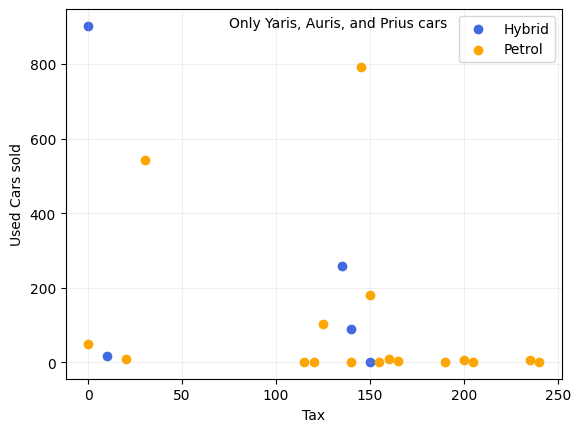

In [331]:
#We filter all Hybrid and Petrol car, and select columns: fuelType, tax, and count of each one. Also for cars of interest
dftax = df[df['fuelType'].isin(['Hybrid','Petrol']) & df['model'].isin([' Yaris', ' Auris',' Prius'])]
dftax = dftax.groupby(['fuelType','tax'])['fuelType','tax'].value_counts()

dftax2 = pd.DataFrame(dftax).rename(columns= {0:'count'}).reset_index()
#print(dftax2,type(dftax2))

xh = dftax2[dftax2['fuelType'] == 'Hybrid']['tax']
yh = dftax2[dftax2['fuelType'] == 'Hybrid']['count']
xp = dftax2[dftax2['fuelType'] == 'Petrol']['tax']
yp = dftax2[dftax2['fuelType'] == 'Petrol']['count']

#print(yh, type(yh))

plt.scatter(xh, yh, color = 'royalblue')
plt.scatter(xp, yp, color = 'orange')
plt.xlabel('Tax')
plt.ylabel('Used Cars sold')
plt.legend(['Hybrid','Petrol'])
plt.grid(alpha = 0.2)
plt.text(75,900,'Only Yaris, Auris, and Prius cars', fontsize = 10)
plt.show()

Same happens if we analyze the 3 most competitive hybrid cars, there is a big opportunity to promote with tax reduction benefits.

Are they similar in sales price?

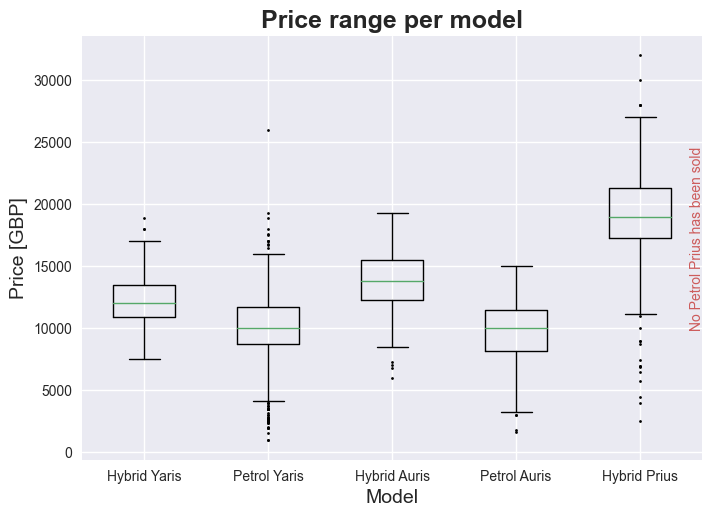

In [326]:
#First I want to see which Hybrid models are available
dfh = df[df['fuelType']=='Hybrid']
dfp = df[df['fuelType']=='Petrol']

PrYarisH = dfh['price'][dfh['model']==' Yaris']
PrYarisP = dfp['price'][dfp['model']==' Yaris']
PrAurisH = dfh['price'][dfh['model']==' Auris']
PrAurisP = dfp['price'][dfp['model']==' Auris']
PrPriusH = dfh['price'][dfh['model']==' Prius']
PrPriusP = dfp['price'][dfp['model']==' Prius']

data2 = [PrYarisH,PrYarisP,PrAurisH,PrAurisP,PrPriusH]

flierprops = dict(marker='.', markersize=2)

plt.boxplot(data2,
           labels = ['Hybrid Yaris','Petrol Yaris','Hybrid Auris','Petrol Auris','Hybrid Prius'],
            flierprops= flierprops    
           )
plt.xlabel('Model', size = 14)
plt.ylabel('Price [GBP]', size = 14)
plt.title('Price range per model', size = 18, weight = 'semibold', fontfamily = 'Arial')
plt.text(5.40,10000,'No Petrol Prius has been sold', fontsize = 10,rotation = 'vertical', color = 'indianred')
plt.show()

Hybrid car are about 30-40% more expensive in average. But also we can find some Petrol cars a lot cheaper than average, in some cases.

## Business Metrics

Based on all the analysis made, I recommend to use the percentage of hybrid and electric sold.

On the last 6 months, we find that 30% of sold cars were hybrid. The higher this percentage, the better for our goals.

## Recommendations

The most competitive hybrid cars are the models "Yaris","Auris" and "Prius". I recommend to focus sales on these models.
There are two major adventages between same models petrol cars: enviroment friendly and tax. So you should launch a campaign promoting these benefits.

Is necessary to improve the data quality by defining cleary what "Others" fuel types means, or at least track the number of electric cars sold, in order to go deeper insights to improve the sales
